## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preperation

In [4]:
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
    
data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1], chr_int(data1[2]), data1[3], chr_int(data1[4]), data1[5], data1[6], data1[7], data1[8], data1[9], chr_int(data1[10]), chr_int(data1[11]), chr_int(data1[12]), data1[13], data1[14]])
        

In [5]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [6]:
df = pd.DataFrame(data)
df = pd.DataFrame(data)
df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']


### Shape of the data

In [7]:
df.shape

(32561, 15)

In [8]:
# count the item per country
counts = df.groupby('country').size()
print (counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [9]:
male = df[(df.sex == 'Male')]
male1 = df[(df.sex == 'Male') & (df.income == '>50K\n')]
female = df[(df.sex == 'Female')]
female1 = df[(df.sex == 'Female')& (df.income == '>50K\n')]

## Explanatory Data Analysis

### Sumaraizing the data

In [10]:
df1 = df[(df.income == '>50K\n')]

In [11]:
print(' The rate of people with high income is', int(len(df1)/len(df)*100), '%')
print('The rate of men with high income is:', int( len( male1)/ float ( len(male)) *100) , '%')
print('The rate of women with high income is:',  int( len( female1)/ float ( len(female)) *100) , '%')

 The rate of people with high income is 24 %
The rate of men with high income is: 30 %
The rate of women with high income is: 10 %


In [12]:
print ('age', df.age.mean())

age 38.58164675532078


### Mean

In [13]:
print('The average age of men is:', male['age'].mean())
print('The average age of women is:', female['age'].mean())
print('The average age of high-income men is:', male1['age'].mean())
print('The average age of high-income women is:', female1['age'].mean())


The average age of men is: 39.43354749885268
The average age of women is: 36.85823043357163
The average age of high-income men is: 44.62578805163614
The average age of high-income women is: 42.125530110262936


### Sample Variance

In [14]:
male_mu = male['age'].mean()
female_mu = female['age'].mean()
male_var = male['age'].var()
female_var = female['age'].var()
male_std = male['age'].std()
female_std = female['age'].std()

# Print the statistics of age for men and women
print('Statistics of age for men: mu:', male_mu, 'var:', male_var, 'std:', male_std)
print('Statistics of age for women: mu:', female_mu, 'var:', female_var, 'std:', female_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


### Sample Median

In [15]:
ml_median = male['age'].median()
fm_median = female['age'].median()
print("Median age per men and women: ", ml_median, fm_median)

ml_median_age = male1['age'].median()
fm_median_age = female1['age'].median()
print("Median age per men and women with high-income: ", ml_median_age, fm_median_age)


Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


### Quantiles and Percentiles

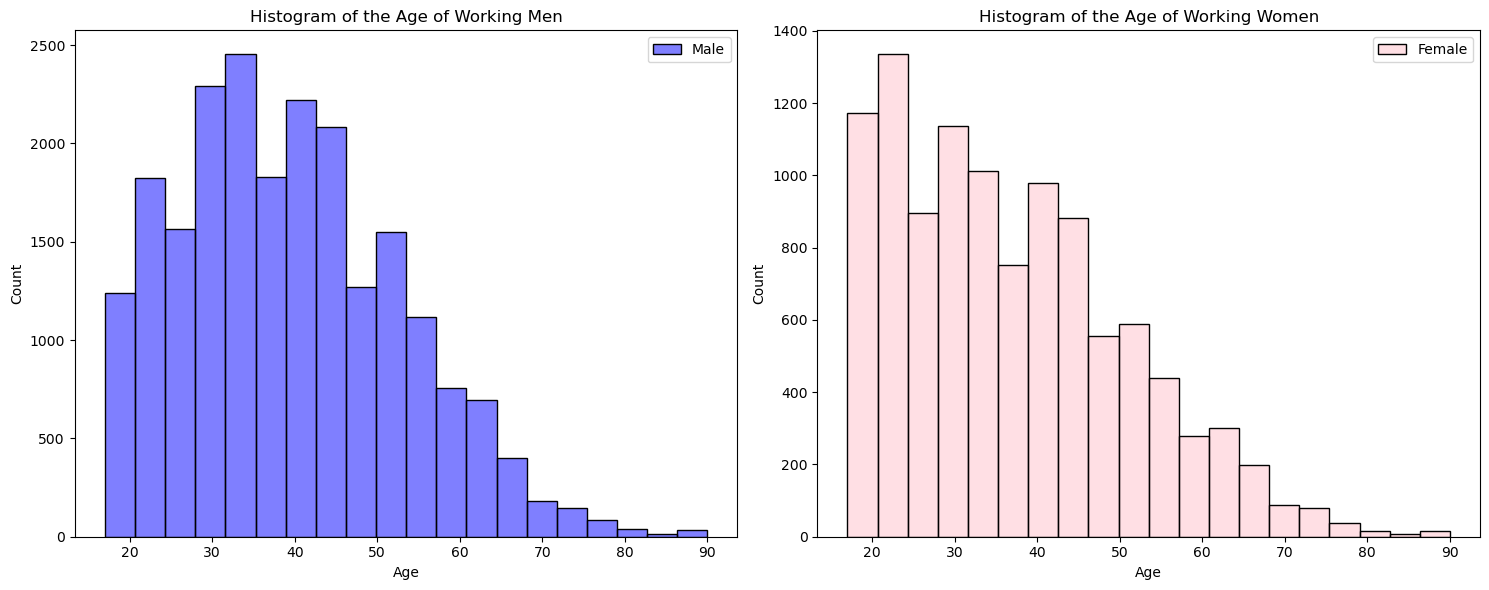

In [16]:
plt.figure(figsize=(15, 6))

# Create Table 1 - Histogram of the Age of Working Men
plt.subplot(1, 2, 1)
sns.histplot(data=male, x="age", bins=20, color='blue', alpha=0.5, label='Male')
plt.title('Histogram of the Age of Working Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Create Table 2 - Histogram of the Age of Working Women
plt.subplot(1, 2, 2)
sns.histplot(data=female, x="age", bins=20, color='pink', alpha=0.5, label='Female')
plt.title('Histogram of the Age of Working Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()



### Data Distributions

<Axes: >

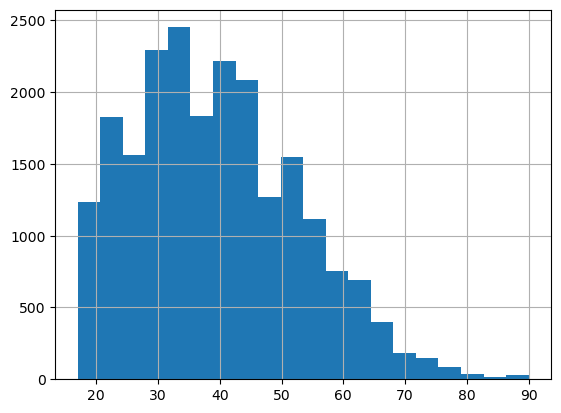

In [17]:
ml_age = male['age']
ml_age.hist(density=0, histtype='stepfilled', bins=20)


<Axes: >

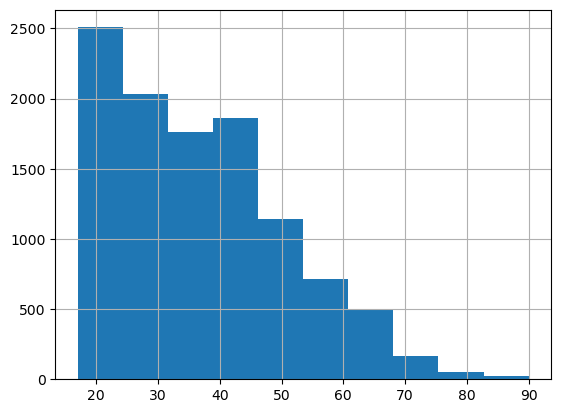

In [18]:
fm_age = female['age']
fm_age.hist(density=0, histtype='stepfilled', bins=10)

<Axes: >

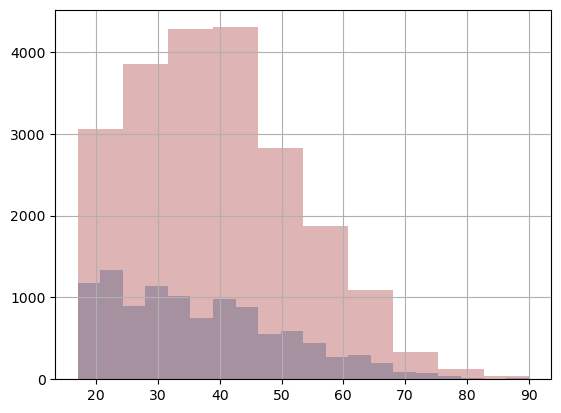

In [19]:
fm_age.hist(density=0, histtype='stepfilled', alpha=0.5, bins=20)
ml_age.hist(density=0, histtype='stepfilled', alpha=0.5, color=sns.desaturate("indianred", 0.75), bins=10)

<Axes: >

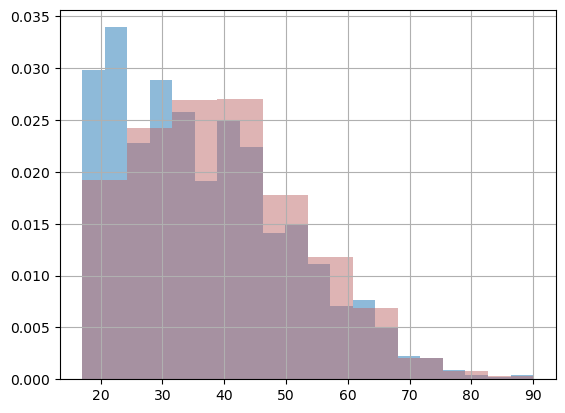

In [20]:
fm_age.hist(density=1, histtype='stepfilled', alpha=0.5, bins=20)
ml_age.hist(density=1, histtype='stepfilled', alpha=0.5, bins=10, color=sns.desaturate("indianred", 0.75))

<Axes: >

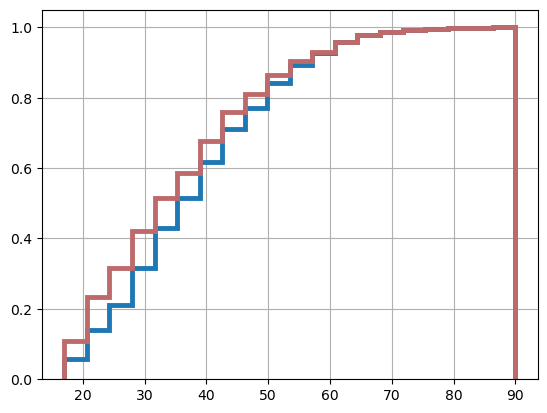

In [21]:
ml_age.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
fm_age.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20, color=sns.desaturate("indianred", 0.75))

### Outliers Treatment

In [43]:
# Filter the original DataFrame
df2 = df.drop(df.index[
    (df.income == '>50K\n') &
    (df['age'] > df['age'].median() + 35) &
    (df['age'] > df['age'].median() - 15)
])

# Create filtered age series for ml1 and fm1
ml1_age = male1['age']
fm1_age = female1['age']

# Filter the age series ml1_age and fm1_age
ml2_age = ml1_age.drop(ml1_age.index[(ml1_age > df['age'].median() + 35) & 
                                   (ml1_age > df['age'].median() - 15)])
fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > df['age'].median() + 35) & 
                                   (fm1_age > df['age'].median() - 15)])


In [23]:
# Calculate mean, standard deviation, and median for filtered age series of men and women
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

# Print statistics for filtered age series of men and women
print("Men statistics:")
print("Mean:", mu2ml, "Std:", std2ml)
print("Median:", md2ml)
print("Min:", ml2_age.min(), "Max:", ml2_age.max())
print("Women statistics:")
print("Mean:", mu2fm, "Std:", std2fm)
print("Median:", md2fm)
print("Min:", fm2_age.min(), "Max:", fm2_age.max())


Men statistics:
Mean: 44.317982123920615 Std: 10.019749857171412
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343714
Median: 41.0
Min: 19 Max: 72


In [44]:
# compare df and df2
df.equals(df2)


False

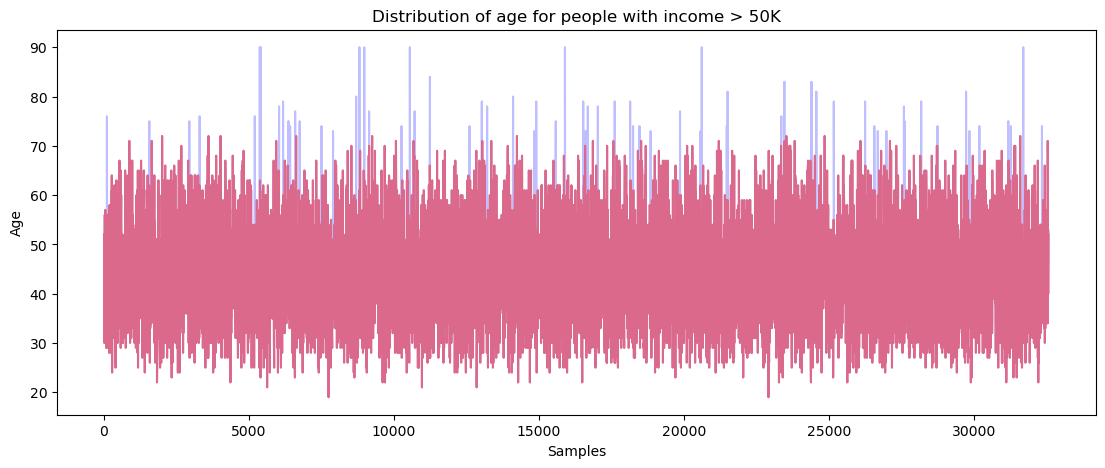

In [45]:
plt.figure(figsize=(13.4, 5))
# Plot the ages of people with income > 50K from the first dataframe in blue
df.age[(df.income == '>50K\n')].plot(alpha=.25, color='blue')
# Plot the ages of people with income > 50K from the second dataframe in red
df2.age[(df2.income == '>50K\n')].plot(alpha=.45, color='red')
# Set the axis labels
plt.xlabel('Samples')
plt.ylabel('Age')
# Set the title
plt.title('Distribution of age for people with income > 50K')
# Show the plot
plt.show()

In [46]:
## Calculate mean difference with and without outliers
print('The mean difference with outliers is: %4.2f.' % (ml_age.mean() - fm_age.mean()))
print('The mean difference without outliers is: %4.2f.' % (ml2_age.mean() - fm2_age.mean()))


The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


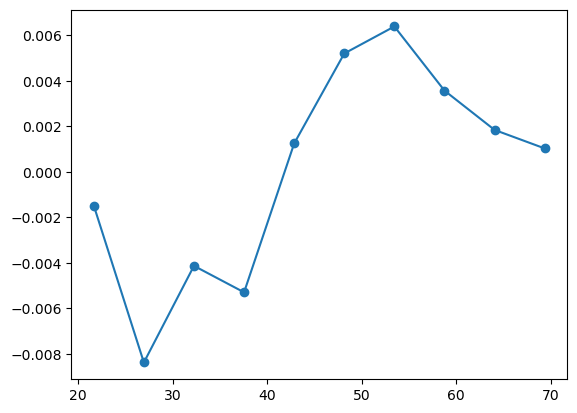

In [49]:
countx, divisionx = np.histogram(ml2_age, density=True)
county, divisiony = np.histogram(fm2_age, density=True)

val = [(divisionx[i] + divisionx[i + 1]) / 2 for i in range(len(divisionx) - 1)]

plt.plot(val, countx - county, 'o-')
plt.show()
